In [18]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('mental_health_workplace_survey.csv')

In [3]:
df.head() 

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [4]:
df.tail()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
2995,3996,28,Female,Brazil,Marketing Manager,Sales,18,46,No,2.86,...,4,Yes,6.97,No,1,80K-100K,7.71,21,7.70,0
2996,3997,24,Male,Brazil,Customer Support,Marketing,14,31,No,2.43,...,1,Yes,5.58,Yes,0,60K-80K,3.76,2,2.59,0
2997,3998,22,Female,Canada,Marketing Manager,Marketing,0,38,No,6.87,...,25,No,3.81,No,0,40K-60K,3.03,2,6.95,0
2998,3999,57,Non-binary,Australia,Data Scientist,HR,2,41,No,3.62,...,24,No,9.72,No,3,100K+,6.02,37,9.06,0
2999,4000,46,Non-binary,India,Software Engineer,IT,17,48,No,9.77,...,49,No,8.21,No,7,60K-80K,7.89,37,1.09,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non-null   float64
 14  PhysicalActivityHrs     3000 non-null   

In [6]:
df.isnull().sum()

EmployeeID                0
Age                       0
Gender                    0
Country                   0
JobRole                   0
Department                0
YearsAtCompany            0
WorkHoursPerWeek          0
RemoteWork                0
BurnoutLevel              0
JobSatisfaction           0
StressLevel               0
ProductivityScore         0
SleepHours                0
PhysicalActivityHrs       0
CommuteTime               0
HasMentalHealthSupport    0
ManagerSupportScore       0
HasTherapyAccess          0
MentalHealthDaysOff       0
SalaryRange               0
WorkLifeBalanceScore      0
TeamSize                  0
CareerGrowthScore         0
BurnoutRisk               0
dtype: int64

In [7]:
df.shape

(3000, 25)

In [8]:
num_cols = df.select_dtypes(include='number').columns  
for col in num_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    cat_cols = df.select_dtypes(include='object').columns   
for col in cat_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

In [12]:
df['working HoursPerDay'] = df['WorkHoursPerWeek'] / 7    #we are creating a new column-work HoursPerDay
df['working HoursPerDay']


0       6.714286
1       8.428571
2       8.428571
3       4.428571
4       4.857143
          ...   
2995    6.571429
2996    4.428571
2997    5.428571
2998    5.857143
2999    6.857143
Name: working HoursPerDay, Length: 3000, dtype: float64

In [10]:
df['Worked'] = df['working HoursPerDay'] >8
df['Worked'].value_counts()

Worked
False    2732
True      268
Name: count, dtype: int64

In [13]:
df["Gender"].unique()

array(['Male', 'Non-binary', 'Prefer not to say', 'Female'], dtype=object)

In [14]:
df["RemoteWork"].unique()

array(['No', 'Hybrid', 'Yes'], dtype=object)

In [15]:
median_workhours = df['working HoursPerDay'].median()
df['working HoursPerDay'] = df['working HoursPerDay'].apply(lambda x: median_workhours if x > 8 else x)

In [16]:
(df['working HoursPerDay'] > 8).sum()

np.int64(0)

<Axes: xlabel='Gender', ylabel='BurnoutLevel'>

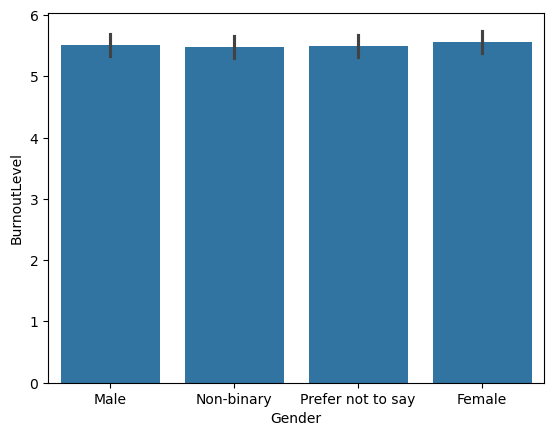

In [19]:
sns.barplot(data=df, x="Gender", y="BurnoutLevel")

<Axes: xlabel='WorkHoursPerWeek', ylabel='BurnoutLevel'>

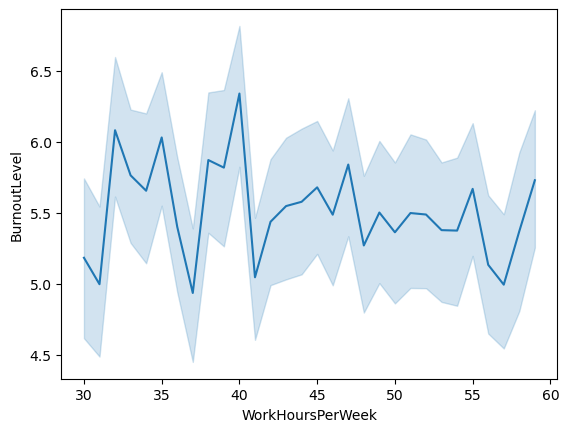

In [20]:
sns.lineplot(data=df, x="WorkHoursPerWeek", y="BurnoutLevel")